ML model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('..\Dataset\creditcard.csv')


In [3]:
# Data Preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [4]:
# Splitting the data into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Create and train the model (Logistic Regression in this example)
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Program Files\Python3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [7]:
# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56833    31]
 [   24    74]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.76      0.73        98

    accuracy                           1.00     56962
   macro avg       0.85      0.88      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Precision (fraud class - Class 1): 0.70

This means that when the model predicts a transaction as fraudulent, it is correct about 70% of the time.
Recall (fraud class - Class 1): 0.76

This means that the model correctly identifies 76% of actual fraudulent transactions.
F1-score (fraud class - Class 1): 0.73

The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics.
Accuracy: 1.00

Overall classification accuracy, which is the proportion of correctly classified transactions out of the total.
Macro Average Precision, Recall, and F1-score: These metrics are computed as the average of precision, recall, and F1-score for both classes (fraud and non-fraud). They provide an overall view of model performance.

Weighted Average Precision, Recall, and F1-score: These metrics are weighted by the number of samples in each class. They are particularly useful when dealing with imbalanced datasets like fraud detection.

Overall, the model appears to perform well in terms of precision, recall, and F1-score for fraud detection. It correctly identifies a significant portion of actual fraud cases (high recall) while maintaining a reasonably high precision. However, the specific choice of threshold (i.e., the trade-off between precision and recall) may depend on the business context and the relative costs of false positives and false negatives in fraud detection.

In [8]:
# Calculate AUPRC (Area Under Precision-Recall Curve) and ROC-AUC
average_precision = average_precision_score(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'\nAverage Precision: {average_precision:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')


Average Precision: 0.67
ROC-AUC Score: 0.95


Average Precision (AUPRC):

AUPRC measures the area under the Precision-Recall Curve. It is particularly valuable for imbalanced datasets like fraud detection.
In this case, the AUPRC is 0.67. This indicates that your model achieves a relatively good balance between precision and recall. It effectively identifies a significant portion of actual fraud cases while maintaining a reasonable level of precision. However, there is room for improvement, and a higher AUPRC value would be ideal.

ROC-AUC Score:

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) measures the ability of the model to distinguish between positive and negative cases across different probability thresholds.
A ROC-AUC score of 0.95 is quite high and indicates that your model performs well in terms of overall classification accuracy. It demonstrates that the model can differentiate between fraud and non-fraud transactions effectively.

In summary, your model is showing promising results with a high ROC-AUC score, suggesting strong discrimination ability, and a moderate AUPRC indicating good overall performance, especially in capturing fraud cases. However, model performance can vary based on the specific context and business requirements. Depending on the consequences of false positives and false negatives, you may want to fine-tune the model's threshold to meet your specific needs. Additionally, continuous monitoring and updates to the model are essential to adapt to changing fraud patterns.

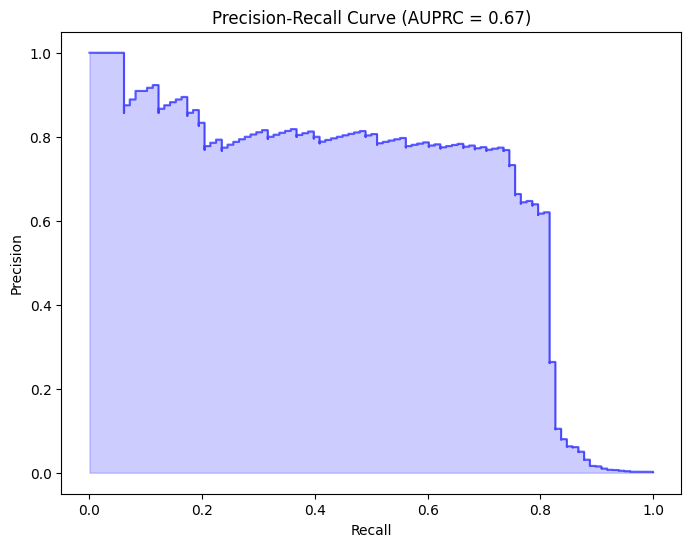

In [9]:
# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.6, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUPRC = {average_precision:.2f})')
plt.show()

In [10]:
import joblib

# Assuming 'model' is your trained fraud detection model
joblib.dump(model, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('..\Dataset\creditcard.csv')

# Data Preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Isolation Forest Model
model = IsolationForest(contamination=0.005, random_state=42)  # Adjust contamination as needed

# Fit the model
model.fit(df.drop('Class', axis=1))

# Predict anomalies (frauds)
y_pred = model.predict(df.drop('Class', axis=1))

# Convert predictions to binary (1 for anomalies, -1 for normal)
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(df['Class'], y_pred_binary))
print("\nClassification Report:\n", classification_report(df['Class'], y_pred_binary))


c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[283109   1206]
 [   274    218]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.15      0.44      0.23       492

    accuracy                           0.99    284807
   macro avg       0.58      0.72      0.61    284807
weighted avg       1.00      0.99      1.00    284807



In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('..\Dataset\creditcard.csv')

# Data Preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Prepare the data
X = df.drop('Class', axis=1)
y = df['Class']

# Define a range of contamination values to search
contamination_range = [0.001, 0.005, 0.01, 0.02, 0.03]

# Create an Isolation Forest model
model = IsolationForest(random_state=42)

# Perform grid search to find the best contamination value
param_grid = {'contamination': contamination_range}
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X, y)

# Get the best contamination value
best_contamination = grid_search.best_params_['contamination']

# Train the final model with the best contamination value
final_model = IsolationForest(contamination=best_contamination, random_state=42)
final_model.fit(X)

# Predict anomalies (frauds)
y_pred = final_model.predict(X)

# Convert predictions to binary (1 for anomalies, -1 for normal)
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

# Evaluate the final model
print("Best Contamination Value:", best_contamination)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_binary))
print("\nClassification Report:\n", classification_report(y, y_pred_binary))


c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Program Files\Python3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: 

Best Contamination Value: 0.001
Confusion Matrix:
 [[284113    202]
 [   409     83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.17      0.21       492

    accuracy                           1.00    284807
   macro avg       0.64      0.58      0.61    284807
weighted avg       1.00      1.00      1.00    284807



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('..\Dataset\creditcard.csv')

In [4]:
df_X = df.drop('Class',axis = 1)
df_y = df['Class']

0    284315
1       492
Name: Class, dtype: int64

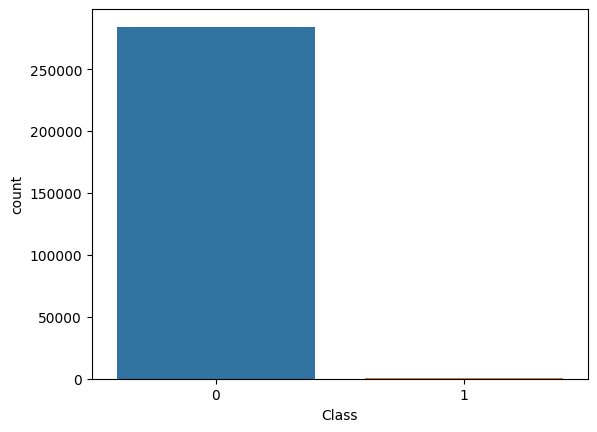

In [5]:
sns.countplot(x = df['Class'])
df['Class'].value_counts()


In [6]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X,y = nm.fit_resample(df_X,df_y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 30), (296, 30), (688,), (296,))

In [10]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [13]:
pred = mlp.predict(X_test)

In [14]:
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       143
           1       1.00      0.95      0.97       153

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [15]:
print(round(accuracy_score(y_test,pred),4))

0.973


In [17]:
import joblib

# Save the trained MLP model to a file
joblib.dump(mlp, 'mlp_classifier_model.pkl')

['mlp_classifier_model.pkl']